# Effect of voltage history on spike timing in a toy model with $I_A$

Shown in fig. 2.

In [1]:
from common import colors, sbarlw

In [2]:
import os
os.chdir(os.path.join('..', '..'))
print(os.getcwd())

/home/efharkin/projects/raphegif/raphegif


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from ezephys import pltools
import tqdm

from grr import IAmod
from grr.Spiketrain import getSpikeLatency
from grr.Tools import reprint

ImportError: No module named IAmod

In [ ]:
IMG_PATH = os.getenv('IMG_PATH')
NOTEBOOK_PATH = os.path.join('figs', 'scripts')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

# Create toy models

In [ ]:
ga = 10
tau_h = 1.2
input_strength = 60.2
Vinput = np.empty((10000, 1))
step_index = 3000
burn_index = 2000  # Burn in period in indices
Vinput[step_index:] = input_strength

toy_IA_neuron = IAmod.IAmod(ga, tau_h, 0)
toy_IA_neuron.vreset = -60.
toy_knockdown_neuron = IAmod.IAmod(ga * 0.5, tau_h, 0)
toy_knockdown_neuron.vreset = -60.
toy_ohmic_neuron = IAmod.IAmod(0, tau_h, 0)
toy_ohmic_neuron.vreset = -60.

In [ ]:
pre_pulse = {
    'lo': -70.,
    'hi': -45.
}

spec_model = gs.GridSpec(2, 2, height_ratios = [1, 0.2], hspace = 0.1)

fig = plt.figure(figsize = (1.7, 1))

### A: simulated proof-of-principle

V_ax_lo = plt.subplot(spec_model[0, 0])
I_ax_lo = plt.subplot(spec_model[1, 0])

# Simulations without depolarizing pre-pulse
Vinput[:step_index] = toy_IA_neuron.ss_clamp(pre_pulse['lo'])

lo_sim = IAmod.Simulation(toy_IA_neuron, pre_pulse['lo'], Vinput)
lo_sim.V[lo_sim.spks] = 60
V_ax_lo.plot(lo_sim.t_vec[burn_index:], lo_sim.V[burn_index:], '-', color=colors['ser'])
V_ax_lo.set_ylim(-100, 62)
I_ax_lo.plot(lo_sim.t_vec[burn_index:], Vinput[burn_index:], color=colors['input'])

lo_sim_ohmic = IAmod.Simulation(toy_ohmic_neuron, pre_pulse['lo'], Vinput)
lo_sim_ohmic.V[lo_sim_ohmic.spks] = 60
V_ax_lo.plot(lo_sim_ohmic.t_vec[burn_index:], lo_sim_ohmic.V[burn_index:], '-', color=colors['4AP'])
I_ax_lo.plot(lo_sim_ohmic.t_vec[burn_index:], Vinput[burn_index:], color = 'gray')

V_ax_hi = plt.subplot(spec_model[0, 1])
I_ax_hi = plt.subplot(spec_model[1, 1])

# Simulations with depolarizing pre-pulse
Vinput[:step_index] = toy_IA_neuron.ss_clamp(pre_pulse['hi'])

hi_sim = IAmod.Simulation(toy_IA_neuron, pre_pulse['hi'], Vinput)
hi_sim.V[hi_sim.spks] = 60
V_ax_hi.plot(hi_sim.t_vec[burn_index:], hi_sim.V[burn_index:], '-', color=colors['ser'], 
             label='LIF $+ I_A$')
V_ax_hi.set_ylim(V_ax_lo.get_ylim())
I_ax_hi.plot(lo_sim.t_vec[burn_index:], Vinput[burn_index:], color=colors['input'])
I_ax_hi.set_ylim(I_ax_lo.get_ylim())

hi_sim_ohmic = IAmod.Simulation(toy_ohmic_neuron, pre_pulse['hi'], Vinput)
hi_sim_ohmic.V[hi_sim_ohmic.spks] = 60
V_ax_hi.plot(hi_sim_ohmic.t_vec[burn_index:], hi_sim_ohmic.V[burn_index:], '-', color=colors['4AP'], 
             label='LIF')
#I_ax_hi.plot(Vinput[burn_index:], color = colors['input'])

V_ax_hi.legend()
V_ax_lo.axhline(-60, color = 'k', ls = '--', lw = 0.5, dashes = (10, 10))
V_ax_lo.annotate('$-60$mV', (8, -70), ha = 'right', va='top')

V_ax_hi.axhline(-60, color = 'k', ls = '--', lw = 0.5, dashes = (10, 10))
#V_ax_hi.annotate('$-60$mV', (5000, -68), ha = 'right')

# TODO fix this annotation
I_ax_lo.annotate('26mV', (8, 24), ha = 'right', va = 'top')
#I_ax_hi.annotate('26mV', (5000, 24), ha = 'right', va = 'top')

pltools.add_scalebar(
    ax = V_ax_lo, 
    y_units = 'mV', 
    x_units=r'$\tau_\mathrm{mem}$',
    y_size=50, 
    x_size=2,
    anchor = (0, 0.2), 
    y_label_space = (0.05),
    bar_space=0,
    linewidth=sbarlw
)
pltools.add_scalebar(
    ax = I_ax_lo, 
    y_units = 'mV', 
    omit_x = True, 
    anchor = (0, 0.2), 
    y_label_space = (0.05),
    linewidth=sbarlw
)
pltools.hide_border(ax = V_ax_lo)
pltools.hide_ticks(ax = V_ax_lo)
pltools.hide_border(ax = I_ax_lo)
pltools.hide_ticks(ax = I_ax_lo)

#pltools.add_scalebar(ax = ax_ohmic, y_units = 'mV', omit_x = True, anchor = (-0.05, 0), y_label_space = (-0.05))
pltools.hide_border(ax = V_ax_hi)
pltools.hide_ticks(ax = V_ax_hi)
pltools.hide_border(ax = I_ax_hi)
pltools.hide_ticks(ax = I_ax_hi)

plt.subplots_adjust(left=0.2, bottom=0.15, top=0.95, right=0.95)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'toy_IA_traces.png'))
    plt.savefig(os.path.join(IMG_PATH, 'toy_IA_traces.svg'))

In [7]:
input_strength = 60.2
Vinput = np.empty((10000, 1))
step_index = 0
Vinput[step_index:] = input_strength
dt = 1e-3

latency_data = {
    'IA_V0': [],
    'IA_latency': [],
    'knockdown_V0': [],
    'knockdown_latency': [],
    'ohmic_V0': [],
    'ohmic_latency': []
}
for V0 in np.linspace(-90, -21, 25):
    reprint('Running simulations for V0 = {}'.format(V0))
    
    for mod, latency_label, V0_label in zip(
        [toy_IA_neuron, toy_knockdown_neuron, toy_ohmic_neuron], 
        ['IA_latency', 'knockdown_latency', 'ohmic_latency'], 
        ['IA_V0', 'knockdown_V0', 'ohmic_V0']
    ):
        Vinput[:step_index] = mod.ss_clamp(V0)
        V_mat, spks_mat, _, _ = mod.simulate(V0, Vinput, dt=1e-3)
        latency_data[latency_label].append(
            getSpikeLatency(
                spks_mat.flatten().astype(np.float16), step_index * 1e-3, threshold=0.5, dt=dt
            )
        )
        latency_data[V0_label].append(V0)#V_mat.flatten()[(step_index - 100):(step_index-1)].mean())

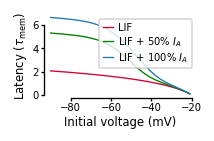

In [8]:
plt.figure(figsize=(1.7, 1))

plt.plot(latency_data['ohmic_V0'], latency_data['ohmic_latency'], label='LIF', color=colors['4AP'])
plt.plot(latency_data['knockdown_V0'], latency_data['knockdown_latency'], label='LIF + 50% $I_A$', color='green')
plt.plot(latency_data['IA_V0'], latency_data['IA_latency'], label= 'LIF + 100% $I_A$', color=colors['ser'])

plt.xlabel('Initial voltage (mV)')
plt.ylabel(r'Latency ($\tau_\mathrm{mem}$)')
plt.legend()
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.2, bottom=0.25, top=0.95, right=0.95)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'toy_IA_absolute_latency.png'))
    plt.savefig(os.path.join(IMG_PATH, 'toy_IA_absolute_latency.svg'))

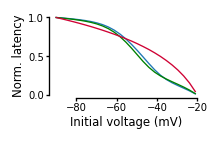

In [9]:
plt.figure(figsize=(1.7, 1))

plt.plot(
    latency_data['IA_V0'], 
    latency_data['IA_latency'] / np.nanmax(latency_data['IA_latency']), 
    label= 'Bl.', 
    color=colors['ser']
)
plt.plot(
    latency_data['knockdown_V0'], 
    latency_data['knockdown_latency'] / np.nanmax(latency_data['knockdown_latency']), 
    label='50\% KD', 
    color='green'
)
plt.plot(
    latency_data['ohmic_V0'], 
    latency_data['ohmic_latency'] / np.nanmax(latency_data['ohmic_latency']), 
    label='KO', 
    color=colors['4AP']
)

plt.xlabel('Initial voltage (mV)')
plt.ylabel('Norm. latency')
#plt.legend()
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.2, bottom=0.25, top=0.95, right=0.95)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'toy_IA_relative_latency.png'))
    plt.savefig(os.path.join(IMG_PATH, 'toy_IA_relative_latency.svg'))